In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report , confusion_matrix
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r'C:\Users\Downloads\228_482_bundle_archive\diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df['Glucose'].unique()

array([148,  85, 183,  89, 137, 116,  78, 115, 197, 125, 110, 168, 139,
       189, 166, 100, 118, 107, 103, 126,  99, 196, 119, 143, 147,  97,
       145, 117, 109, 158,  88,  92, 122, 138, 102,  90, 111, 180, 133,
       106, 171, 159, 146,  71, 105, 101, 176, 150,  73, 187,  84,  44,
       141, 114,  95, 129,  79,   0,  62, 131, 112, 113,  74,  83, 136,
        80, 123,  81, 134, 142, 144,  93, 163, 151,  96, 155,  76, 160,
       124, 162, 132, 120, 173, 170, 128, 108, 154,  57, 156, 153, 188,
       152, 104,  87,  75, 179, 130, 194, 181, 135, 184, 140, 177, 164,
        91, 165,  86, 193, 191, 161, 167,  77, 182, 157, 178,  61,  98,
       127,  82,  72, 172,  94, 175, 195,  68, 186, 198, 121,  67, 174,
       199,  56, 169, 149,  65, 190], dtype=int64)

In [6]:



df['BloodPressure'].unique()

array([ 72,  66,  64,  40,  74,  50,   0,  70,  96,  92,  80,  60,  84,
        30,  88,  90,  94,  76,  82,  75,  58,  78,  68, 110,  56,  62,
        85,  86,  48,  44,  65, 108,  55, 122,  54,  52,  98, 104,  95,
        46, 102, 100,  61,  24,  38, 106, 114], dtype=int64)

In [7]:
df['SkinThickness'].unique()

array([35, 29,  0, 23, 32, 45, 19, 47, 38, 30, 41, 33, 26, 15, 36, 11, 31,
       37, 42, 25, 18, 24, 39, 27, 21, 34, 10, 60, 13, 20, 22, 28, 54, 40,
       51, 56, 14, 17, 50, 44, 12, 46, 16,  7, 52, 43, 48,  8, 49, 63, 99],
      dtype=int64)

In [8]:
df['Insulin'].unique()

array([  0,  94, 168,  88, 543, 846, 175, 230,  83,  96, 235, 146, 115,
       140, 110, 245,  54, 192, 207,  70, 240,  82,  36,  23, 300, 342,
       304, 142, 128,  38, 100,  90, 270,  71, 125, 176,  48,  64, 228,
        76, 220,  40, 152,  18, 135, 495,  37,  51,  99, 145, 225,  49,
        50,  92, 325,  63, 284, 119, 204, 155, 485,  53, 114, 105, 285,
       156,  78, 130,  55,  58, 160, 210, 318,  44, 190, 280,  87, 271,
       129, 120, 478,  56,  32, 744, 370,  45, 194, 680, 402, 258, 375,
       150,  67,  57, 116, 278, 122, 545,  75,  74, 182, 360, 215, 184,
        42, 132, 148, 180, 205,  85, 231,  29,  68,  52, 255, 171,  73,
       108,  43, 167, 249, 293,  66, 465,  89, 158,  84,  72,  59,  81,
       196, 415, 275, 165, 579, 310,  61, 474, 170, 277,  60,  14,  95,
       237, 191, 328, 250, 480, 265, 193,  79,  86, 326, 188, 106,  65,
       166, 274,  77, 126, 330, 600, 185,  25,  41, 272, 321, 144,  15,
       183,  91,  46, 440, 159, 540, 200, 335, 387,  22, 291, 39

In [9]:
df['BMI'].unique()

array([33.6, 26.6, 23.3, 28.1, 43.1, 25.6, 31. , 35.3, 30.5,  0. , 37.6,
       38. , 27.1, 30.1, 25.8, 30. , 45.8, 29.6, 43.3, 34.6, 39.3, 35.4,
       39.8, 29. , 36.6, 31.1, 39.4, 23.2, 22.2, 34.1, 36. , 31.6, 24.8,
       19.9, 27.6, 24. , 33.2, 32.9, 38.2, 37.1, 34. , 40.2, 22.7, 45.4,
       27.4, 42. , 29.7, 28. , 39.1, 19.4, 24.2, 24.4, 33.7, 34.7, 23. ,
       37.7, 46.8, 40.5, 41.5, 25. , 25.4, 32.8, 32.5, 42.7, 19.6, 28.9,
       28.6, 43.4, 35.1, 32. , 24.7, 32.6, 43.2, 22.4, 29.3, 24.6, 48.8,
       32.4, 38.5, 26.5, 19.1, 46.7, 23.8, 33.9, 20.4, 28.7, 49.7, 39. ,
       26.1, 22.5, 39.6, 29.5, 34.3, 37.4, 33.3, 31.2, 28.2, 53.2, 34.2,
       26.8, 55. , 42.9, 34.5, 27.9, 38.3, 21.1, 33.8, 30.8, 36.9, 39.5,
       27.3, 21.9, 40.6, 47.9, 50. , 25.2, 40.9, 37.2, 44.2, 29.9, 31.9,
       28.4, 43.5, 32.7, 67.1, 45. , 34.9, 27.7, 35.9, 22.6, 33.1, 30.4,
       52.3, 24.3, 22.9, 34.8, 30.9, 40.1, 23.9, 37.5, 35.5, 42.8, 42.6,
       41.8, 35.8, 37.8, 28.8, 23.6, 35.7, 36.7, 45

In [10]:
df['DiabetesPedigreeFunction'].unique()

array([0.627, 0.351, 0.672, 0.167, 2.288, 0.201, 0.248, 0.134, 0.158,
       0.232, 0.191, 0.537, 1.441, 0.398, 0.587, 0.484, 0.551, 0.254,
       0.183, 0.529, 0.704, 0.388, 0.451, 0.263, 0.205, 0.257, 0.487,
       0.245, 0.337, 0.546, 0.851, 0.267, 0.188, 0.512, 0.966, 0.42 ,
       0.665, 0.503, 1.39 , 0.271, 0.696, 0.235, 0.721, 0.294, 1.893,
       0.564, 0.586, 0.344, 0.305, 0.491, 0.526, 0.342, 0.467, 0.718,
       0.962, 1.781, 0.173, 0.304, 0.27 , 0.699, 0.258, 0.203, 0.855,
       0.845, 0.334, 0.189, 0.867, 0.411, 0.583, 0.231, 0.396, 0.14 ,
       0.391, 0.37 , 0.307, 0.102, 0.767, 0.237, 0.227, 0.698, 0.178,
       0.324, 0.153, 0.165, 0.443, 0.261, 0.277, 0.761, 0.255, 0.13 ,
       0.323, 0.356, 0.325, 1.222, 0.179, 0.262, 0.283, 0.93 , 0.801,
       0.207, 0.287, 0.336, 0.247, 0.199, 0.543, 0.192, 0.588, 0.539,
       0.22 , 0.654, 0.223, 0.759, 0.26 , 0.404, 0.186, 0.278, 0.496,
       0.452, 0.403, 0.741, 0.361, 1.114, 0.457, 0.647, 0.088, 0.597,
       0.532, 0.703,

In [11]:
df['Age'].unique()

array([50, 31, 32, 21, 33, 30, 26, 29, 53, 54, 34, 57, 59, 51, 27, 41, 43,
       22, 38, 60, 28, 45, 35, 46, 56, 37, 48, 40, 25, 24, 58, 42, 44, 39,
       36, 23, 61, 69, 62, 55, 65, 47, 52, 66, 49, 63, 67, 72, 81, 64, 70,
       68], dtype=int64)

In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# What is "normal" blood pressure?
    A blood pressure reading has a top number (systolic) and bottom number (diastolic). 
    Normal blood pressure is less than 120 over 80 (120/80). 
    People whose blood pressure is above the normal range should ask their doctor how to lower it.

# Gestational diabetes
    Gestational diabetes is a type of diabetes that develops during pregnancy. 
    Diabetes means your blood glucose, also called blood sugar, is too high. 
    Too much glucose in your blood is not good for you or your baby. Gestational diabetes is usually diagnosed in the
    24th to 28th week of pregnancy.

# GLUCOSE
    If your blood glucose level is higher than 190 mg/dL (10.6 mmol/L) after the one-hour test, 
    you'll be diagnosed with gestational diabetes. 
    For the three-hour test: A normal fasting blood glucose level is lower than 95 mg/dL (5.3 mmol/L).

# What is a normal 2 hour glucose tolerance test?
    Normal Results
    Normal blood values for a 75 gram OGTT used to check for type 2 diabetes in those who are not pregnant:
    Fasting: \60 to 100 mg/dL (3.3 to 5.5 mmol/L) 1 hour: less than 200 mg/dL (11.1 mmol/L) 2 hours: less than 140 mg/dL (7.8 mmol/L)


# What is a healthy insulin level?
    Reference Range
    Insulin Level	Insulin Level (SI Units*)
    Fasting	< 25 mIU/L	< 174 pmol/L
    30 minutes after glucose administration	30-230 mIU/L	208-1597 pmol/L
    1 hour after glucose administration	18-276 mIU/L	125-1917 pmol/L
    2 hour after glucose administration	16-166 mIU/L	111-1153 pmol/L

# What is too low of a BMI?
    You can check if you're underweight by using our BMI healthy weight calculator, which shows your body mass index (BMI). 
    If your BMI is below 18.5, this suggests that your weight may be too low. 
    If you're underweight, or you're concerned that someone you know is, tell a GP or practice nurse.

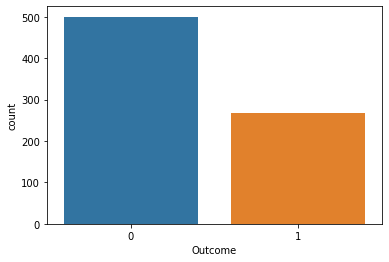

In [13]:
sns.countplot(df.Outcome)

In [14]:



corr_matrix = df.corr()
corr_matrix['Outcome'].sort_values(ascending=False)

Outcome                     1.000000
Glucose                     0.466581
BMI                         0.292695
Age                         0.238356
Pregnancies                 0.221898
DiabetesPedigreeFunction    0.173844
Insulin                     0.130548
SkinThickness               0.074752
BloodPressure               0.065068
Name: Outcome, dtype: float64

In [15]:
corr_matrix1 = df.corr()
corr_matrix1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [16]:
df.Glucose.median()

117.0

In [17]:
from sklearn.impute import SimpleImputer
imp_median = SimpleImputer(missing_values=0, strategy='median')
df['Glucose']=imp_median.fit_transform(df[['Glucose']])
df['BloodPressure']=imp_median.fit_transform(df[['BloodPressure']])
df['SkinThickness']=imp_median.fit_transform(df[['SkinThickness']])
df['Insulin']=imp_median.fit_transform(df[['Insulin']])
imp_mean = SimpleImputer(missing_values=0, strategy='mean')
df['BMI']=imp_mean.fit_transform(df[['BMI']])





In [18]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


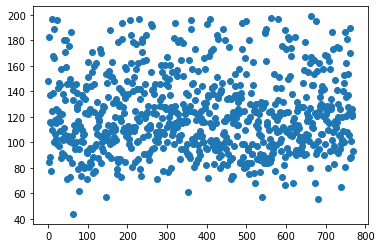

In [19]:
plt.scatter(range(1,769),df.Glucose)


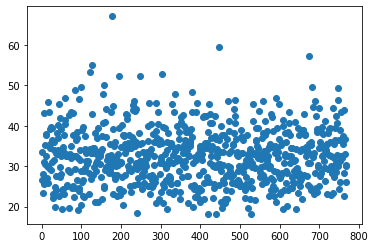

In [20]:
plt.scatter(range(1,769),df.BMI)

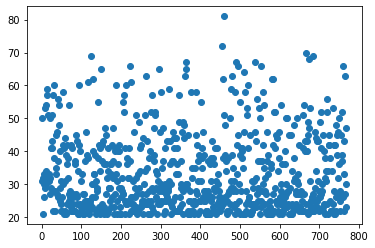

In [21]:
plt.scatter(range(1,769),df.Age)

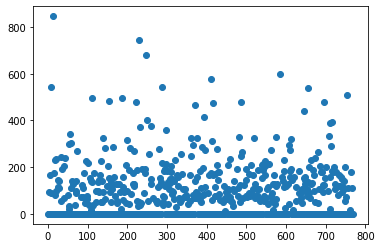

In [5]:
plt.scatter(range(1,769),df.Insulin)

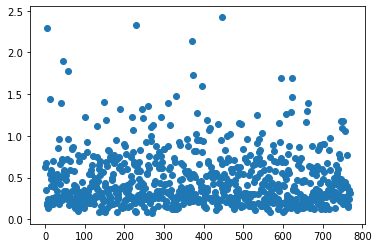

In [6]:
plt.scatter(range(1,769),df.DiabetesPedigreeFunction)


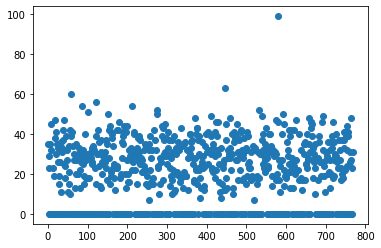

In [7]:
plt.scatter(range(1,769),df.SkinThickness)


In [22]:
X= df.iloc[:,:-1].values

Y = df.iloc[:,-1].values

In [23]:
X.shape,Y.shape

((768, 8), (768,))

In [24]:
print("X:",X)
print("Y:",Y)

X: [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
Y: [1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0

In [25]:
"""X1 = df.drop(['Outcome'], axis=1)
Y1= df.Outcome.values
X1
Y1"""
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [26]:
from  sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
Xscaled = sc.fit_transform(X)


In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(Xscaled, Y, test_size = 0.1, random_state = 42)

In [28]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((691, 8), (77, 8), (691,), (77,))

In [29]:
X_train

array([[-0.25095213, -0.84344335, -1.35553305, ..., -1.12906883,
         1.4258696 ,  0.49003012],
       [-1.14185152, -0.15307315, -0.5283186 , ..., -0.24123743,
         0.06379607, -0.95646168],
       [ 0.04601433, -0.38319655,  1.62243896, ...,  0.74847627,
        -0.84827977, -0.27575966],
       ...,
       [ 1.82781311, -0.67906949,  1.12611029, ...,  1.91284532,
         2.00573238,  0.40494237],
       [-1.14185152,  0.63592135, -0.03198993, ...,  1.4470977 ,
        -0.8059981 , -0.36084741],
       [-1.14185152,  0.10992502,  1.95332473, ..., -1.44927032,
        -0.63385134, -1.04154944]])

In [30]:
X_test

array([[ 6.39947260e-01, -7.77693803e-01, -1.19009016e+00,
         4.42994592e-01,  5.71411469e-01,  2.24510195e-01,
        -1.26471402e-01,  8.30381132e-01],
       [-5.47918591e-01, -3.17447008e-01,  2.16174400e-01,
         3.29170622e-01, -1.81541243e-01,  4.71938618e-01,
        -9.78144869e-01, -1.04154944e+00],
       [-5.47918591e-01, -4.48946092e-01, -6.93761490e-01,
        -1.23012884e-02, -1.81541243e-01, -2.41237425e-01,
        -9.47943682e-01, -1.04154944e+00],
       [ 1.23388019e+00, -4.81820863e-01,  6.29781623e-01,
        -1.23012884e-02, -1.81541243e-01, -1.14362344e+00,
         1.16009915e+00,  6.45913543e-02],
       [ 9.36913723e-01,  4.71547498e-01,  1.45699607e+00,
        -1.23012884e-02, -1.81541243e-01, -3.72228944e-01,
        -7.90897511e-01,  1.42599540e+00],
       [ 6.39947260e-01, -6.13319948e-01, -3.19899336e-02,
         3.29170622e-01,  5.71411469e-01,  7.63030881e-01,
        -4.46603982e-01,  1.85143417e+00],
       [-8.44885053e-01, -1.665312

In [31]:
#Using LogisticRegression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42)
LR.fit(X_train,Y_train)

LogisticRegression(random_state=42)

In [32]:
YP = LR.predict(X_test)

In [33]:
print(LR.score(X_train,Y_train))
print(LR.score(X_test,Y_test))
print(accuracy_score(Y_test,YP))
print(confusion_matrix(Y_test,YP))

0.7727930535455861
0.7402597402597403
0.7402597402597403
[[40 10]
 [10 17]]


In [34]:
LR.predict([[6,48.0,72.0,35.0,125.0,33.6,0.627,50],[1,85.0,66.0,29.0,125.0,26.6,0.351,31],[10,101.0,76.0,48.0,180.0,32.9,0.171,63],[2,122.0,70.0,27.0,125.0,36.8,0.340,27]])

array([1, 1, 1, 1], dtype=int64)

In [69]:
import pickle
pickle.dump(LR,open('diabetesmodel.pkl','wb'))

In [36]:
#Using DecisionTree
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier(random_state=42)
DTR.fit(X_train, Y_train)

DecisionTreeClassifier(random_state=42)

In [37]:
DTR.predict([[6,48.0,72.0,35.0,125.0,33.6,0.627,50],[1,85.0,66.0,29.0,125.0,26.6,0.351,31],[10,101.0,76.0,48.0,180.0,32.9,0.171,63],[2,122.0,70.0,27.0,125.0,36.8,0.340,27]])

array([0, 0, 0, 0], dtype=int64)

In [38]:
YP1 = DTR.predict(X_test)

In [39]:
print(DTR.score(X_train,Y_train))
print(DTR.score(X_test,Y_test))

print(accuracy_score(Y_test,YP1))
print(confusion_matrix(Y_test,YP1))

1.0
0.7142857142857143
0.7142857142857143
[[37 13]
 [ 9 18]]


In [40]:
from sklearn.ensemble import RandomForestClassifier
RFG = RandomForestClassifier(n_estimators=120,random_state=42)
RFG.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=120, random_state=42)

In [41]:
YP2 = RFG.predict(X_test)

In [42]:
RFG.predict([[6,48.0,72.0,35.0,125.0,33.6,0.627,50],[1,85.0,66.0,29.0,125.0,26.6,0.351,31],[10,101.0,76.0,48.0,180.0,32.9,0.171,63],[2,122.0,70.0,27.0,125.0,36.8,0.340,27]])


array([1, 1, 1, 1], dtype=int64)

In [43]:
print(RFG.score(X_train,Y_train))
print(RFG.score(X_test,Y_test))
print(accuracy_score(Y_test,YP2))
print(confusion_matrix(Y_test,YP2))


1.0
0.7142857142857143
0.7142857142857143
[[37 13]
 [ 9 18]]


In [44]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
Acc = []

for i in range(1,20):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_test,Y_test)
    yp = knn.predict(X_test)
    Acc.append(accuracy_score(Y_test,yp))
print(Acc)

[1.0, 0.8181818181818182, 0.8441558441558441, 0.7272727272727273, 0.7922077922077922, 0.7402597402597403, 0.7662337662337663, 0.7272727272727273, 0.7272727272727273, 0.7532467532467533, 0.7402597402597403, 0.7532467532467533, 0.7532467532467533, 0.7402597402597403, 0.7402597402597403, 0.7272727272727273, 0.7272727272727273, 0.7142857142857143, 0.7142857142857143]


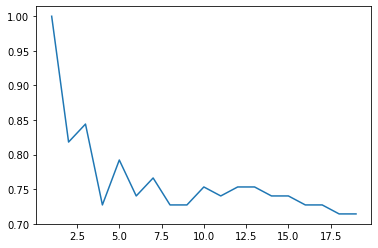

In [45]:
plt.plot(range(1,20),Acc)

In [46]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3,metric="euclidean")
knn.fit(X_test,Y_test)

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [47]:
print(knn.score(X_train,Y_train))
print(knn.score(X_test,Y_test))



0.7395079594790159
0.8441558441558441


In [48]:
knn.predict([[1,48.0,72.0,35.0,125.0,33.6,0.627,50],[1,85.0,66.0,29.0,125.0,26.6,0.351,31],[10,101.0,76.0,48.0,180.0,32.9,0.171,63]])

array([1, 1, 1], dtype=int64)

In [49]:
#from pycaret.datasets import get_data 
diabetes = df
# Importing module and initializing setup 
from pycaret.classification import * 
clf1 = setup(data = diabetes, target = 'Outcome')
# train logistic regression model
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,CatBoost Classifier,0.7541,0.8243,0.5664,0.6776,0.6136,0.4363,0.4421,2.9935
1,Logistic Regression,0.7446,0.7891,0.5073,0.6726,0.5732,0.3987,0.4090,0.0800
2,Gradient Boosting Classifier,0.7374,0.7978,0.5503,0.6517,0.5914,0.4010,0.4075,0.2095
3,Ridge Classifier,0.7371,0.0000,0.5126,0.6626,0.5743,0.3893,0.3984,0.0510
4,Linear Discriminant Analysis,0.7371,0.7966,0.5126,0.6644,0.5750,0.3897,0.3991,0.0234
5,Extra Trees Classifier,0.7355,0.7831,0.4965,0.6667,0.5606,0.3796,0.3922,0.3408
6,Ada Boost Classifier,0.7280,0.7781,0.5664,0.6219,0.5901,0.3879,0.3907,0.1744
7,Light Gradient Boosting Machine,0.7222,0.7862,0.5547,0.6135,0.5784,0.3734,0.3768,0.1122
8,Random Forest Classifier,0.7167,0.7598,0.4263,0.6564,0.5085,0.3228,0.3423,0.1323
9,Extreme Gradient Boosting,0.7110,0.7718,0.5602,0.5940,0.5718,0.3556,0.3584,0.1343


# REMOVING OUTLIER(After apply simple imputer)

In [49]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [50]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


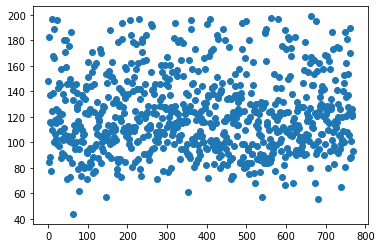

In [51]:
#AS we seen there are very few whose Gluocse value is less than 65
plt.scatter(range(1,769),df.Glucose)


In [52]:
df1 = df[df['Glucose']>70]
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


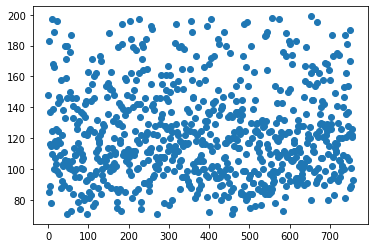

In [53]:
plt.scatter(range(1,758),df1.Glucose)

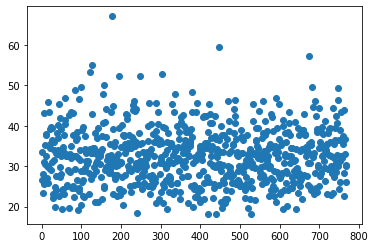

In [54]:
#as we seen there are very few those BMI index are greater than 55
plt.scatter(range(1,769),df.BMI)

In [55]:
df2 = df1[df1['BMI']<50]

In [56]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


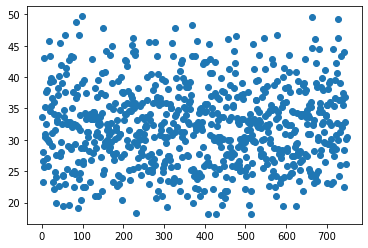

In [57]:
plt.scatter(range(1,749),df2.BMI)

In [58]:
X1= df2.iloc[:,:-1].values

Y1 = df2.iloc[:,-1].values

In [59]:
from sklearn.model_selection import train_test_split
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X1, Y1, test_size = 0.3, random_state = 42)

In [60]:
from  sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train1 = sc.fit_transform(X_train1)
X_test1  = sc.transform(X_test1)

In [61]:
#Using LogisticRegression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42)
LR.fit(X_train1,Y_train1)
YPO = LR.predict(X_test1)

In [62]:
print(LR.score(X_train1,Y_train1))
print(accuracy_score(Y_test1,YPO))
print(confusion_matrix(Y_test1,YPO))

0.7820267686424475
0.7555555555555555
[[121  27]
 [ 28  49]]


In [63]:
#Using DecisionTree
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier(random_state=42)
DTR.fit(X_train1, Y_train1)
YPO1 = DTR.predict(X_test1)


In [64]:
print(DTR.score(X_train1,Y_train1))

print(accuracy_score(Y_test1,YPO1))
print(confusion_matrix(Y_test1,YPO1))

1.0
0.6533333333333333
[[100  48]
 [ 30  47]]


In [65]:
from sklearn.ensemble import RandomForestClassifier
RFG = RandomForestClassifier(n_estimators=120,random_state=42)
RFG.fit(X_train1,Y_train1)
YPO2 = RFG.predict(X_test1)


In [66]:
print(RFG.score(X_train1,Y_train1))
print(accuracy_score(Y_test1,YPO2))
print(confusion_matrix(Y_test1,YPO2))

1.0
0.7244444444444444
[[115  33]
 [ 29  48]]


In [67]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [68]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


# removing column

In [70]:
df3 = df.drop('BloodPressure',axis=1)
df3 = df3.drop('SkinThickness',axis=1)

In [71]:
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [72]:
X= df2.iloc[:,:-1].values

Y = df2.iloc[:,-1].values

In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [74]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((523, 8), (225, 8), (523,), (225,))

In [75]:
Y_train

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,

In [86]:
from  sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)


In [87]:
#Using LogisticRegression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42)
LR.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [88]:
YP = LR.predict(X_test)

In [89]:
print(LR.score(X_train,Y_train))
print(LR.score(X_test,Y_test))
print(accuracy_score(Y_test,YP))
print(confusion_matrix(Y_test,YP))

0.7820267686424475
0.3422222222222222
0.3422222222222222
[[  0 148]
 [  0  77]]


In [90]:
#Using DecisionTree
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier(random_state=42)
DTR.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [91]:
YP1 = DTR.predict(X_test)

In [92]:
print(DTR.score(X_train,Y_train))
print(DTR.score(X_test,Y_test))
print(accuracy_score(Y_test,YP1))
print(confusion_matrix(Y_test,YP1))


1.0
0.6577777777777778
0.6577777777777778
[[148   0]
 [ 77   0]]


In [93]:
from sklearn.ensemble import RandomForestClassifier
RFG = RandomForestClassifier(n_estimators=120,random_state=42)
RFG.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [94]:
YP2 = RFG.predict(X_test)

In [95]:
print(RFG.score(X_train,Y_train))
print(RFG.score(X_test,Y_test))
print(accuracy_score(Y_test,YP2))
print(confusion_matrix(Y_test,YP2))


1.0
0.3422222222222222
0.3422222222222222
[[  0 148]
 [  0  77]]


# With REMOVING OUTLIER + COLUMN

In [96]:

df3 = df2.drop('BloodPressure',axis=1)
df3 = df3.drop('SkinThickness',axis=1)

In [97]:
df2

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,125.0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,125.0,26.6,0.351,31,0
2,8,183.0,64.0,29.0,125.0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.0,180.0,32.9,0.171,63,0
764,2,122.0,70.0,27.0,125.0,36.8,0.340,27,0
765,5,121.0,72.0,23.0,112.0,26.2,0.245,30,0
766,1,126.0,60.0,29.0,125.0,30.1,0.349,47,1


In [98]:
X= df3.iloc[:,:-1].values

Y = df3.iloc[:,-1].values

In [99]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

In [100]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((523, 6), (225, 6), (523,), (225,))

In [101]:
from  sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test  = sc.fit_transform(X_test)

In [102]:
#Using LogisticRegression
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state=42)
LR.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [103]:
YP = LR.predict(X_test)

In [104]:
print(LR.score(X_train,Y_train))
print(LR.score(X_test,Y_test))
print(accuracy_score(Y_test,YP))
print(confusion_matrix(Y_test,YP))

0.7858508604206501
0.7777777777777778
0.7777777777777778
[[128  20]
 [ 30  47]]


In [105]:
#Using DecisionTree
from sklearn.tree import DecisionTreeClassifier
DTR = DecisionTreeClassifier(random_state=42)
DTR.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [106]:
YP1 = DTR.predict(X_test)

In [107]:
print(DTR.score(X_train,Y_train))
print(DTR.score(X_test,Y_test))
print(accuracy_score(Y_test,YP1))
print(confusion_matrix(Y_test,YP1))

1.0
0.68
0.68
[[108  40]
 [ 32  45]]


In [108]:
from sklearn.ensemble import RandomForestClassifier
RFG = RandomForestClassifier(n_estimators=120,random_state=42)
RFG.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=120,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [109]:
YP2 = RFG.predict(X_test)

In [110]:
print(RFG.score(X_train,Y_train))
print(RFG.score(X_test,Y_test))
print(accuracy_score(Y_test,YP2))
print(confusion_matrix(Y_test,YP2))

1.0
0.72
0.72
[[120  28]
 [ 35  42]]


In [111]:
#comparing OUTPUT score

In [112]:
SimpleRFG =[ [1.0,0.7489177489177489],[1.0,0.728889],[1.0,0.72],[1,0.72]]

RFGDATA = pd.DataFrame(Simple,['SimpleRFG','RemovingColumnsRFG','RemovingOutlierRFG','RemovingOitlierColumn'])
RFGDATA

NameError: name 'Simple' is not defined

In [113]:
Simple =[ [1.0,0.69],[1.0,0.65],[1.0,0.65],[1,0.68]]
DTRDATA = pd.DataFrame(Simple,['SimpleDTR','RemovingColumnsDTR','RemovingOutlierDTR','RemovingOitlierColumn'])
DTRDATA

,0,1
SimpleDTR,1.0,0.69
RemovingColumnsDTR,1.0,0.65
RemovingOutlierDTR,1.0,0.65
RemovingOitlierColumn,1.0,0.68


In [114]:
Simple = [ [1.0,0.69],[1.0,0.65],[1.0,0.65],[0.78,0.778] ]
LRDATA = pd.DataFrame(Simple,['SimpleLR','RemovingColumnsLR','RemovingOutlierLR','RemovingOitlierColumn'])
LRDATA

,0,1
SimpleLR,1.00,0.690
RemovingColumnsLR,1.00,0.650
RemovingOutlierLR,1.00,0.650
RemovingOitlierColumn,0.78,0.778


In [115]:
import pickle

In [116]:
pickle.dump(LR,open('diabetesmodel.pkl','wb'))

In [118]:
model = pickle.load(open('diabetesmodel.pkl','rb'))
print(model.predict([[1,48.0,72.0,35.0,125.0,33.6]]))

[1]
